In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
################################################################################
# Definindo funções
################################################################################
def gerar_transacao(config: dict) -> list:
    """ 
    Gera uma linha de dados aleatórios de acordo com os parâmetros para
    cada variável, definida no dicionário de configuração. 
    :param config: Dicionário contendo as porcentagens de cada variável
    em caso de fraude.
    :return: Lista de valores aleatórios gerados para cada coluna do 
    dataframe a ser criado.
    """
    categoria = np.random.choice(list(config['categoria'].keys()))
    localizacao = np.random.choice(list(config['localizacao'].keys()))
    faixa_etaria = np.random.choice(list(config['faixa_etaria'].keys()))
    dia_semana = np.random.choice(list(config['dia_semana'].keys()))
    hora = np.random.choice(list(config['hora'].keys()))
    fraude_prob = np.mean([
        config['categoria'][categoria],
        config['localizacao'][localizacao],
        config['faixa_etaria'][faixa_etaria],
        config['dia_semana'][dia_semana],
        config['hora'][hora]
    ])
    fraude = np.random.rand() < fraude_prob
    if fraude:
        valor_transacao = np.random.uniform(*config['valor']['fraude'])
    else:
        valor_transacao = np.random.uniform(*config['valor']['legitimo'])
    return categoria, localizacao, faixa_etaria, dia_semana, hora, valor_transacao, fraude

def tratamento_hora(df: pd.DataFrame) -> pd.DataFrame:  
    """  
    Transforma o formato de hora com tipo e numeração ideal para análise.
    :param df: Dataframe com coluna de hora.
    :return: Dataframe com coluna de hora tratada.
    """
    df['hora'] = df['hora'].astype(str)
    df['hora_transacao'] = df['hora'].str.replace('h', '', regex=False)
    df['hora_transacao'] = pd.to_datetime(df['hora_transacao'], format='%H', errors='coerce')
    df['hora_transacao'] = df['hora_transacao'].dt.hour
    df = df.drop(columns=['hora'])
    return df

def tratamento_categoricas(df: pd.DataFrame, coluna: str) -> pd.DataFrame:
    """  
    Trata coluna de valor categórico para gerar colunas binárias de 
    classificação.
    :param df: Dataframe com coluna de dados categóricos.
    :param coluna: Nome da coluna a ser tratada.
    :return: Dataframe com coluna categórica trasnformada em colunas binárias.
    """
    encoded_array = encoder.fit_transform(df[[coluna]])
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([coluna]))
    df_final = pd.concat([df.drop(coluna, axis=1), encoded_df], axis=1)
    return df_final

In [3]:
################################################################################
# Definindo objetos
################################################################################

# Valores para o dataframe
n_transacoes = 10000
dados = {
    'categoria': [],
    'localizacao': [],
    'faixa_etaria': [],
    'dia_semana': [],
    'hora': [],
    'valor_transacao': [],
    'fraude': []
}
dados_config = {'localizacao': {
    'Norte': 0.034,
    'Nordeste': 0.028,
    'Centro-Oeste': 0.025,
    'Sudeste': 0.021,
    'Sul': 0.011},
    'categoria' : {
        'Celular': 0.082,
        'Eletrônicos': 0.080,
        'Informática': 0.043,
        'Automotivo': 0.034,
        'Eletrodomésticos': 0.033,
        'Acessórios': 0.030,
        'Móveis': 0.023,
        'Beleza': 0.022,
        'Esportes': 0.020,
        'Eletroportáteis': 0.020},
    'faixa_etaria': {
        'até 25 anos': 0.040,
        'entre 26 e 35 anos': 0.019,
        'entre 36 e 50 anos': 0.015,
        'acima de 51 anos': 0.021},
    'dia_semana': {
        'Domingo': 0.017,
        'Segunda': 0.021,
        'Terça': 0.022,
        'Quarta': 0.022,
        'Quinta': 0.022,
        'Sexta': 0.021,
        'Sábado': 0.020},
    'hora': {
        '00h': 0.036,
        '01h': 0.042,
        '02h': 0.069,
        '03h': 0.077,
        '04h': 0.067,
        '05h': 0.037,
        '06h': 0.014,
        '07h': 0.017,
        '08h': 0.014,
        '09h': 0.015,
        '10h': 0.016,
        '11h': 0.018,
        '12h': 0.020,
        '13h': 0.021,
        '14h': 0.021,
        '15h': 0.022,
        '16h': 0.023,
        '17h': 0.022,
        '18h': 0.022,
        '19h': 0.021,
        '20h': 0.021,
        '21h': 0.020,
        '22h': 0.021,
        '23h': 0.026},
    'valor': {'fraude': (500.00, 2000.00),
        'legitimo': (50.00, 700.00)}}

In [4]:
################################################################################
# Encoder e seed
################################################################################

np.random.seed(42)
encoder = OneHotEncoder(sparse_output=False)

In [5]:
################################################################################
# Iteração para geração de dataframe
################################################################################

for i in range(n_transacoes):
    categoria, localizacao, faixa_etaria, dia_semana, hora, valor_transacao, fraude = gerar_transacao(dados_config)
    transacao = {
        'categoria': categoria,
        'localizacao': localizacao,
        'faixa_etaria': faixa_etaria,
        'dia_semana': dia_semana,
        'hora': hora,
        'valor_transacao': valor_transacao,
        'fraude': fraude
    }
    for key, value in transacao.items():
        dados[key].append(value)
df = pd.DataFrame(dados)

In [6]:
################################################################################
# Verificando as colunas do dataframe
################################################################################

print(df.head())

         categoria   localizacao        faixa_etaria dia_semana hora  \
0           Móveis       Sudeste         até 25 anos     Sábado  10h   
1  Eletroportáteis  Centro-Oeste  entre 36 e 50 anos      Terça  10h   
2           Beleza  Centro-Oeste  entre 26 e 35 anos     Quinta  01h   
3      Eletrônicos       Sudeste         até 25 anos    Domingo  11h   
4         Esportes         Norte  entre 36 e 50 anos      Terça  09h   

   valor_transacao  fraude  
0       437.952603   False  
1       440.724758   False  
2       660.059261   False  
3        54.593098   False  
4       682.941087   False  


In [7]:
################################################################################
# Verificando o dataframe gerado
################################################################################

df

,categoria,localizacao,faixa_etaria,dia_semana,hora,valor_transacao,fraude
0,Móveis,Sudeste,até 25 anos,Sábado,10h,437.952603,False
1,Eletroportáteis,Centro-Oeste,entre 36 e 50 anos,Terça,10h,440.724758,False
2,Beleza,Centro-Oeste,entre 26 e 35 anos,Quinta,01h,660.059261,False
3,Eletrônicos,Sudeste,até 25 anos,Domingo,11h,54.593098,False
4,Esportes,Norte,entre 36 e 50 anos,Terça,09h,682.941087,False
...,...,...,...,...,...,...,...
9995,Esportes,Centro-Oeste,entre 26 e 35 anos,Terça,04h,217.340580,False
9996,Acessórios,Sudeste,entre 36 e 50 anos,Quinta,21h,273.640842,False
9997,Celular,Sudeste,entre 36 e 50 anos,Sexta,00h,68.896961,False
9998,Automotivo,Norte,entre 36 e 50 anos,Quinta,00h,1400.769500,True


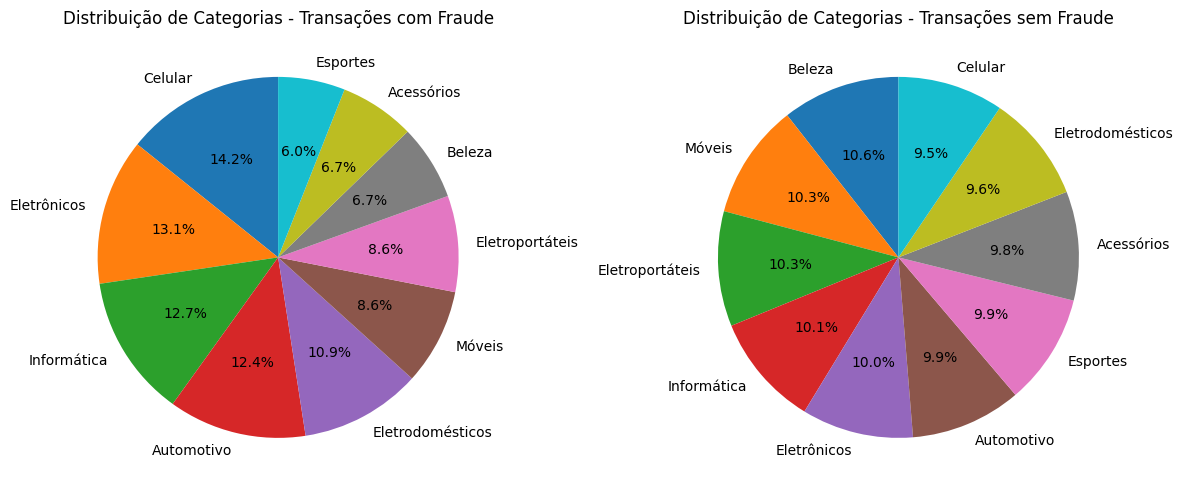

In [8]:
################################################################################
# Frequência de categorias em fraudes e não fraudes
################################################################################

dados_fraude = df[df['fraude'] == 1]
dados_nao_fraude = df[df['fraude'] == 0]

contagem_fraude = dados_fraude['categoria'].value_counts()
contagem_nao_fraude = dados_nao_fraude['categoria'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(contagem_fraude, labels=contagem_fraude.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribuição de Categorias - Transações com Fraude')

axes[1].pie(contagem_nao_fraude, labels=contagem_nao_fraude.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribuição de Categorias - Transações sem Fraude')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Valor da Transação')

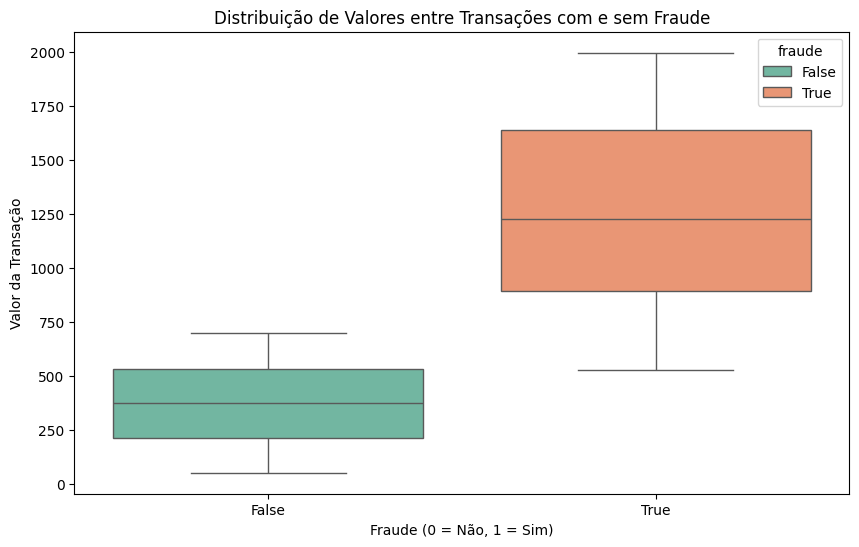

In [9]:
################################################################################
# Distribuição de valores entre fraudes e não fraudes
################################################################################

plt.figure(figsize=(10, 6))
sns.boxplot(x='fraude', y='valor_transacao', data=df, palette='Set2', hue='fraude')

plt.title('Distribuição de Valores entre Transações com e sem Fraude')
plt.xlabel('Fraude (0 = Não, 1 = Sim)')
plt.ylabel('Valor da Transação')

